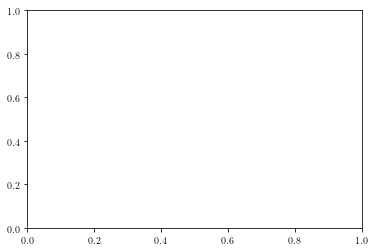

In [41]:
import numpy as np
import math as math
import matplotlib.pyplot as plt
from math import sqrt
from random import seed
from random import random
from time import time
import statistics as stat

duration = 10**2
ensemble_size = 10**2
number_of_time_lapses = duration
number_of_bins = number_of_time_lapses
bx = 1
by = 1
b = 1
plt.rc('text', usetex=True)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
x = list(range(number_of_time_lapses))
y = list(range(number_of_time_lapses))
r = list(range(number_of_time_lapses))
x[0] = 0
y[0] = 0
datax = []
datay = []
cord = [[]]

def get_gyration_endtoend_radius(number_of_chains = 200,show = False):
    
    global datax 
    global datay
    global x,y,r
    global Rg,Rf
    global cord
    Rg = list(range(ensemble_size))
    Rf = list(range(ensemble_size))
    x = list(range(number_of_chains))
    y = list(range(number_of_chains))
    r = list(range(number_of_chains))
    x[0] = 0
    x[1] = b
    y[0] = 0
    y[1] = 0
    
    datax = []
    datay = []
    for _iter in range(ensemble_size):
        seed(_iter)
        for i in range(1,number_of_chains-1):
            r = random()
            r = (math.floor(r - 0.5) + math.ceil(r - 0.5))
            theta = math.atan((y[i]-y[i-1])/(x[i]-x[i-1]))
            x[i+1] = x[i] + b*math.cos(theta+r*math.pi/3)
            y[i+1] = y[i] + b*math.sin(theta+r*math.pi/3)
                
            
            datax.append(x[i])
            datay.append(y[i])
        #Rg[_iter] = np.mean(r)
        #Rf[_iter] = math.sqrt((x[number_of_chains-1] - x[1])**2+ (y[number_of_chains-1] - y[1])**2)

    Rg_mean = 0
    Rf_mean = 0
    #print(Rg_mean)
    if (show == True):
        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles[::-1],labels[::-1],title ='Peclet Numbers',loc = 'upper left')
        cord = np.empty((2,number_of_chains))
        cord[0,:] = x
        cord[1,:] = y
    return (Rg_mean,Rf_mean)
#avg_dist = dist_tau/avg_count
#print(avg_dist)

In [12]:
import math as math
math.atan(-1)
#math.cos(math.pi/3)

-0.7853981633974483

Text(0.5, 1.0, 'Polymer Simulation')

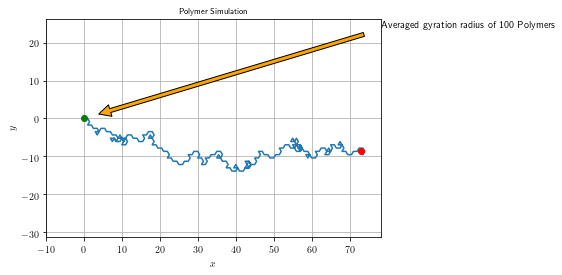

In [43]:
Rg_mean,Rf_mean = get_gyration_endtoend_radius(200,True)
xlim = np.linspace(-10, 10, number_of_time_lapses)
ylim = np.linspace(-10, 10, number_of_time_lapses)
X, Y = np.meshgrid(xlim,ylim)
F = X**2 + Y**2 - Rg_mean**2

fig, ax = plt.subplots()
ax.contour(X,Y,F,[0])
ax.plot(cord[0],cord[1])
ax.plot(cord[0,0],cord[1,0], 'go')
ax.plot(cord[0,-1], cord[1,-1], 'ro')
demo = "Averaged gyration radius of "+str(ensemble_size)+" Polymers"
ax.annotate(demo, xy=(Rg_mean/sqrt(2), Rg_mean/sqrt(2)),  xycoords='data',
            xytext=(1, 1), textcoords='axes fraction',
            arrowprops=dict(facecolor='Orange', shrink=0.05),
            horizontalalignment='left', verticalalignment='top',
            )
ax.axis('equal')
ax.grid(True)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title('Polymer Simulation', fontsize=8)